
Model: Logistic Regression
Accuracy: 0.7781569965870307
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        25
           2       0.87      0.85      0.86       120
           3       1.00      0.12      0.22         8
           4       0.71      0.95      0.82       131

    accuracy                           0.78       293
   macro avg       0.52      0.39      0.38       293
weighted avg       0.70      0.78      0.72       293



C:\Users\PYTHON\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PYTHON\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PYTHON\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


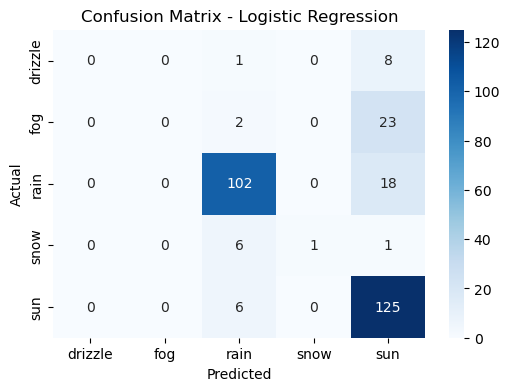


Model: Decision Tree
Accuracy: 0.7337883959044369
Classification Report:
               precision    recall  f1-score   support

           0       0.07      0.11      0.09         9
           1       0.19      0.16      0.17        25
           2       0.88      0.89      0.89       120
           3       0.38      0.38      0.38         8
           4       0.78      0.76      0.77       131

    accuracy                           0.73       293
   macro avg       0.46      0.46      0.46       293
weighted avg       0.74      0.73      0.74       293



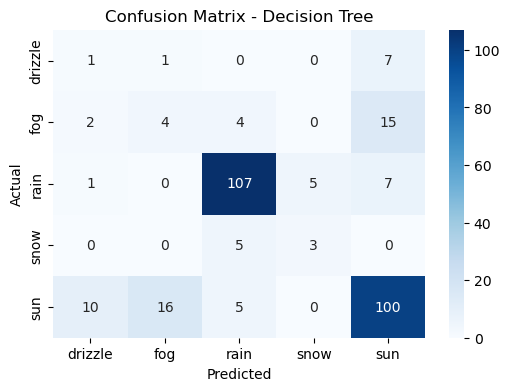


Model: Random Forest
Accuracy: 0.8191126279863481
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.11      0.15         9
           1       0.40      0.08      0.13        25
           2       0.94      0.92      0.93       120
           3       0.50      0.25      0.33         8
           4       0.77      0.95      0.85       131

    accuracy                           0.82       293
   macro avg       0.57      0.46      0.48       293
weighted avg       0.78      0.82      0.79       293



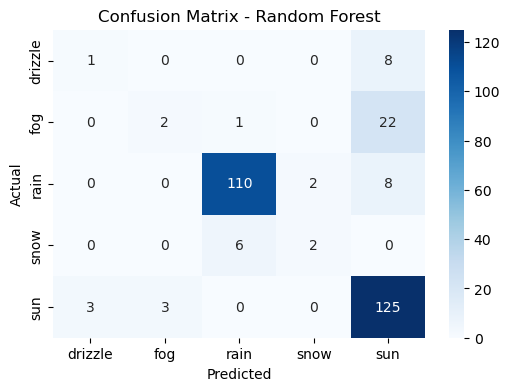


Model: Gradient Boosting
Accuracy: 0.8156996587030717
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.11      0.18         9
           1       0.20      0.04      0.07        25
           2       0.93      0.92      0.92       120
           3       0.40      0.25      0.31         8
           4       0.77      0.95      0.85       131

    accuracy                           0.82       293
   macro avg       0.56      0.45      0.47       293
weighted avg       0.77      0.82      0.78       293



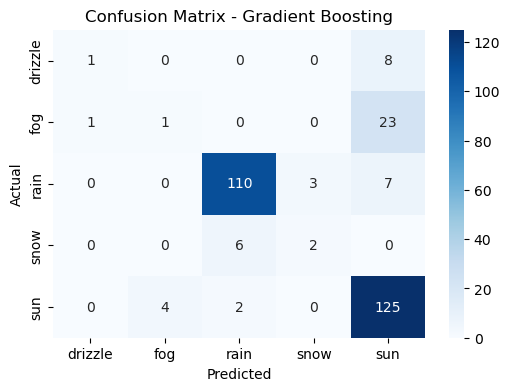


Model: SVM
Accuracy: 0.757679180887372
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        25
           2       0.87      0.82      0.85       120
           3       0.00      0.00      0.00         8
           4       0.69      0.94      0.79       131

    accuracy                           0.76       293
   macro avg       0.31      0.35      0.33       293
weighted avg       0.66      0.76      0.70       293



C:\Users\PYTHON\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PYTHON\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PYTHON\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


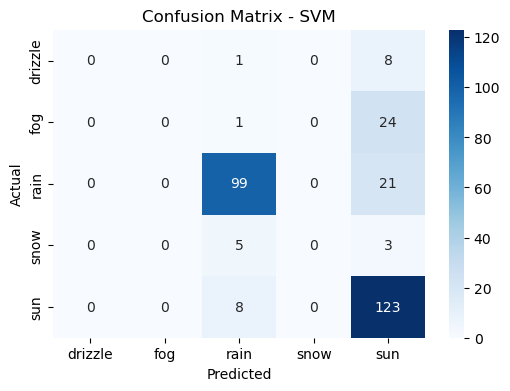

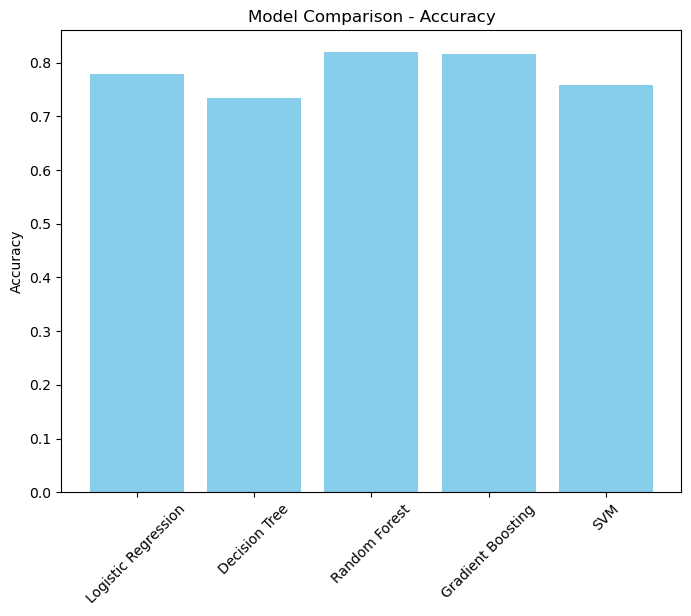


Prediction on Single Row Sample:
Logistic Regression: sun
Decision Tree: drizzle
Random Forest: drizzle
Gradient Boosting: sun
SVM: sun

Weather Labels Mapping:
   Encoded Value    Label
0              0  drizzle
1              1      fog
2              2     rain
3              3     snow
4              4      sun

Prediction Results for Single Row:
   precipitation  temp_max  temp_min  wind Prediction_Logistic Regression  \
0            0.0      12.8       5.0   4.7                            sun   

  Prediction_Decision Tree Prediction_Random Forest  \
0                  drizzle                  drizzle   

  Prediction_Gradient Boosting Prediction_SVM  
0                          sun            sun  


C:\Users\PYTHON\AppData\Local\Temp\ipykernel_14684\261283834.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weather', data=df, palette='viridis')


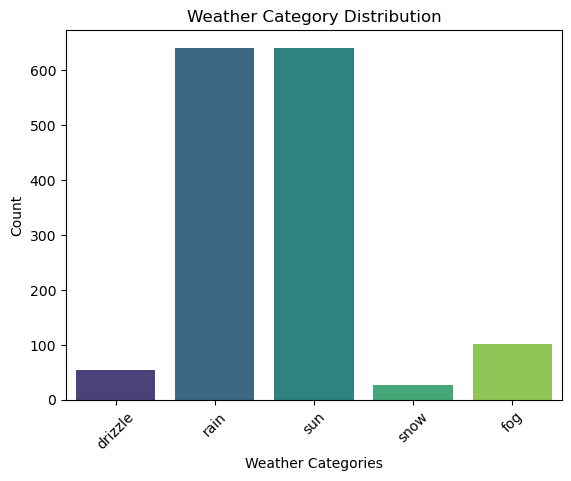

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("weather.csv")  # Replace with actual path

# ------------------ Data Preprocessing ------------------
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Encode 'weather'
le = LabelEncoder()
df['weather_encoded'] = le.fit_transform(df['weather'])

# Features and target
X = df[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = df['weather_encoded']

# Scale features (important for SVM, k-NN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ------------------ Train Multiple Models ------------------
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC()
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# ------------------ Compare Model Performance ------------------
# Plot accuracy comparison
plt.figure(figsize=(8, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

# ------------------ Single Row Sample Data ------------------
single_sample = pd.DataFrame({
    'precipitation': [0.0],  # Example values
    'temp_max': [12.8],
    'temp_min': [5.0],
    'wind': [4.7]
})

# Preprocess the single sample
single_sample_scaled = scaler.transform(single_sample)

# Predict using all models
print("\nPrediction on Single Row Sample:")
single_predictions = {}

# Get predictions for each model
for model_name, model in models.items():
    # Predict encoded label
    pred_encoded = model.predict(single_sample_scaled)
    
    # Decode to original label (text)
    pred_decoded = le.inverse_transform(pred_encoded)
    
    # Store the decoded label
    single_predictions[model_name] = pred_decoded[0]
    
    # Print the prediction for the current model
    print(f"{model_name}: {pred_decoded[0]}")

# Combine the original sample data with predictions
single_sample_predictions = single_sample.copy()
for model_name, pred in single_predictions.items():
    single_sample_predictions[f"Prediction_{model_name}"] = [pred]

# Display the weather labels mapping (text format)
labels_df = pd.DataFrame({
    "Encoded Value": range(len(le.classes_)),
    "Label": le.classes_
})
print("\nWeather Labels Mapping:")
print(labels_df)

# Display the final prediction results
print("\nPrediction Results for Single Row:")
print(single_sample_predictions)

# ------------------ Weather Category Distribution ------------------
# Weather category distribution with text labels
sns.countplot(x='weather', data=df, palette='viridis')
plt.title("Weather Category Distribution")
plt.xlabel("Weather Categories")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()
